## Dataset used: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [1]:
import nltk
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Collection can be called as corpse
sms = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [3]:
sms[2]

"spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [4]:
sms = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t', names=['Type','sms'])

In [5]:
sms

,Type,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
sms.describe()

,Type,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [7]:
sms.groupby('Type').describe().transpose()

Type                           ham  \
sms count                     4825   
    unique                    4516   
    top     Sorry, I'll call later   
    freq                        30   

Type                                                     spam  
sms count                                                 747  
    unique                                                653  
    top     Please call our customer service representativ...  
    freq                                                    4

In [8]:
sms['Length'] = sms['sms'].apply(len)

In [9]:
sms

,Type,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [10]:
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

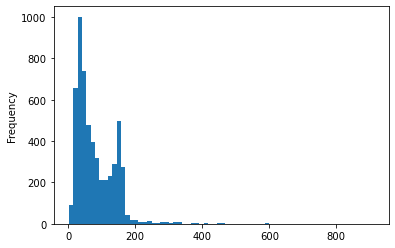

In [11]:
sms['Length'].plot.hist(bins = 70)

In [12]:
sms['Length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [13]:
sms[sms['Length'] == 910]['sms'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

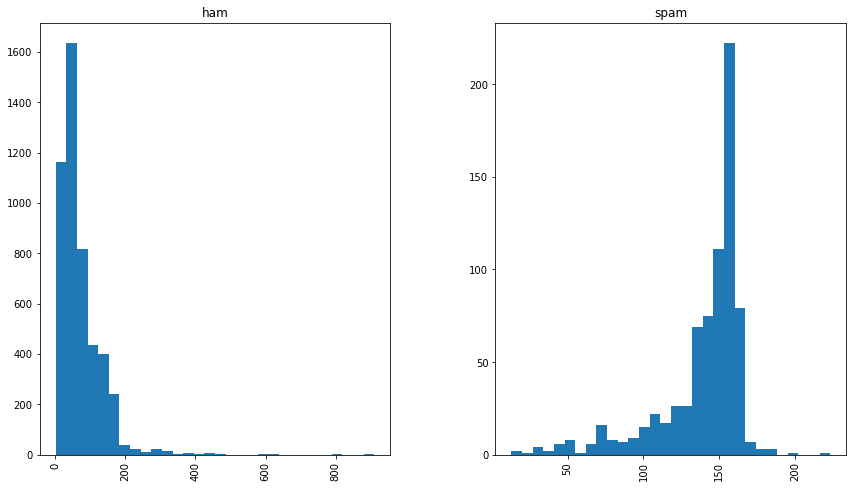

In [14]:
sms.hist(column='Length', by='Type',bins=30,figsize=(14,8))

##### Spam text messages are longer than ham text message

### Text Pre-processing
##### Classification needs feature vectors to perform the task 
##### Using bag of words - each unique word will be represented by a number

In [15]:
import string

### Stopwords = Common words that doesnt tell us about distinguishing feature
from nltk.corpus import stopwords

In [16]:
def text_processing(messages):
    
    """
    1. Removes punctuation
    2. Removes english stopwords
    3. Returns list of cleaned message words
    
    """
    
    # String comprehension to check for punctuation and stopwords
    no_punctuation = [ char for char in messages if char not in string.punctuation ]
    
    no_punctuation = ''.join(no_punctuation)
    
    return [word for word in no_punctuation.split() if word.lower() not in stopwords.words('english')]

In [17]:
# tokenization : converting string into list of tokens ( cleaned words)
sms['sms'].apply(text_processing)

0       [Go, jurong, point, crazy, Available, bugis, n...
1                          [Ok, lar, Joking, wif, u, oni]
2       [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3           [U, dun, say, early, hor, U, c, already, say]
4       [Nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, U, £750, Pou...
5568                   [ü, b, going, esplanade, fr, home]
5569                     [Pity, mood, Soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [Rofl, true, name]
Name: sms, Length: 5572, dtype: object

In [18]:
sms.head()

,Type,sms,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
bag_of_words = CountVectorizer ( analyzer = text_processing).fit(sms['sms'])

In [22]:
print(len(bag_of_words.vocabulary_))

11425


In [23]:
sms_matrix= bag_of_words.transform(sms['sms'])

In [24]:
sms_matrix.shape

(5572, 11425)

In [25]:
# Non-Zero occurences
sms_matrix.nnz

50548

In [26]:
#sparsity compares the number of non zero messages to the total number of messages
sparsity = ( 100 * sms_matrix.nnz / (sms_matrix.shape[0]*sms_matrix.shape[1]) )
print("Sparsity",sparsity)

Sparsity 0.07940295412668218


In [37]:
# TF - IDF 
from sklearn.feature_extraction.text import TfidfTransformer
tf_idf = TfidfTransformer().fit(sms_matrix)

In [38]:
# Testing IDF of a particular word
tf_idf.idf_[bag_of_words.vocabulary_['sorry']]

6.014770874925312

In [39]:
# Converting bag of words into tfidf corpus
bag_of_words_tfidf = tf_idf.transform(sms_matrix)

#### Naive Bayes Classification model for spam - ham detection

In [30]:
from sklearn.naive_bayes import MultinomialNB
spam_detector = MultinomialNB().fit(bag_of_words_tfidf,sms['Type'])

In [31]:
predictions = spam_detector.predict(bag_of_words_tfidf)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sms['sms'], sms['Type'], test_size=0.3, random_state=42)

#### Naive Bayes Classification model for spam - ham detection using pipeline

In [35]:
from sklearn.pipeline import Pipeline

In [43]:
pipeline_model = Pipeline([
    ('bag_of_words', CountVectorizer(analyzer = text_processing)), #string to token inteeger counts
    ('tf_idf',TfidfTransformer()),
    ('spam_detector_classifier',MultinomialNB())
])

In [44]:
pipeline_model.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function text_processing at 0x000001400C1B4A60>)),
                ('tf_idf', TfidfTransformer()),
                ('spam_detector_classifier', MultinomialNB())])

In [46]:
predictions = pipeline_model.predict(X_test)

In [52]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print(classification_report(y_test, predictions),'\n')
print(confusion_matrix(y_test,predictions),'\n')
print("Accuracy : ", accuracy_score(y_test,predictions),'\n')

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1448
        spam       1.00      0.73      0.85       224

    accuracy                           0.96      1672
   macro avg       0.98      0.87      0.91      1672
weighted avg       0.97      0.96      0.96      1672
 

[[1448    0]
 [  60  164]] 

Accuracy :  0.9641148325358851 



#### Random Forest Classification model for spam - ham detection using pipeline

In [66]:
from sklearn.ensemble import RandomForestClassifier
pipeline_rf = Pipeline([
    ("bag_of_words",CountVectorizer(analyzer = text_processing)),
    ("tf_idf",TfidfTransformer()),
    ("Classifier",RandomForestClassifier())
])
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('bag_of_words',
                 CountVectorizer(analyzer=<function text_processing at 0x000001400C1B4A60>)),
                ('tf_idf', TfidfTransformer()),
                ('Classifier', RandomForestClassifier())])

In [68]:
predicitons_rf= pipeline_rf.predict(X_test)

In [69]:
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
print(classification_report(y_test, predicitons_rf),'\n')
print(confusion_matrix(y_test,predicitons_rf),'\n')
print("Accuracy : ", accuracy_score(y_test,predicitons_rf),'\n')

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1448
        spam       1.00      0.81      0.89       224

    accuracy                           0.97      1672
   macro avg       0.99      0.90      0.94      1672
weighted avg       0.98      0.97      0.97      1672
 

[[1448    0]
 [  43  181]] 

Accuracy :  0.9742822966507177 



In [85]:
sample = ["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv"]
predicit_sample= pipeline_rf.predict(sample)
predicit_sample

array(['spam'], dtype=object)